In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv(r"C:\Users\HP\Downloads\iris.csv")

In [4]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [13]:
x = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [15]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()
skf.get_n_splits(x, y)
print(skf)


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [17]:
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
  

TRAIN: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 120

------------- 1 -------------------
[[20  0  0]
 [ 0 20  1]
 [ 0  1 18]]
------------- 2 -------------------
[[20  0  0]
 [ 0 20  1]
 [ 0  4 15]]
------------- 3 -------------------
[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
------------- 4 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  2 17]]
------------- 5 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  2 17]]
------------- 6 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  2 17]]
------------- 7 -------------------
[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
------------- 8 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  1 18]]
------------- 9 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
------------- 10 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  1 18]]
------------- 11 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
------------- 12 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  1 18]]
------------- 13 -------------------
[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
------------- 14 -------------------
[[20  0  0

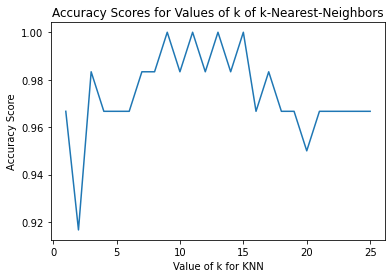

In [22]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
Decision Tree

In [26]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.967


This decision tree predicts 96.è% of the test data correctly. the importance of each predictor can be seen through its feature_importances_ attribute

In [27]:
tree.feature_importances_

array([0.        , 0.        , 0.03015096, 0.96984904])

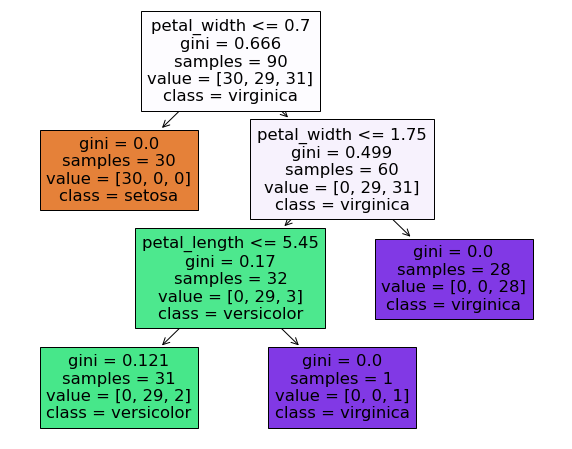

In [28]:
plt.figure(figsize = (10,8))
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

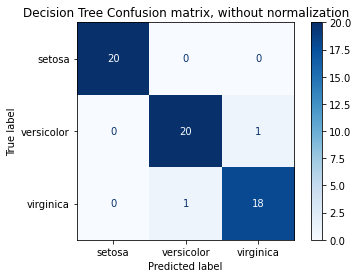

In [29]:
cm = metrics.plot_confusion_matrix(tree, x_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
cm.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [36]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The accuracy for Radius Neighbors Classifier is: 95.0 %

The classification report for Radius Neighbors Classifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.88      1.00      0.93        21
 Iris-virginica       1.00      0.84      0.91        19

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60



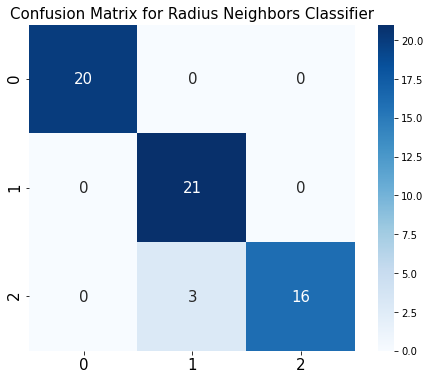

In [37]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier()
rnc.fit(x_train, y_train)
y_pred = rnc.predict(x_test)
acc_rnc = rnc.score(x_test, y_test)
print('The accuracy for Radius Neighbors Classifier is:', acc_rnc * 100, "%")
generate_results(rnc, y_pred, 'Radius Neighbors Classifier')

In [38]:
from sklearn.ensemble import RandomForestClassifier

The accuracy of the Random Forest Classifier is: 96.66666666666667 %

The classification report for Random Forest Classifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



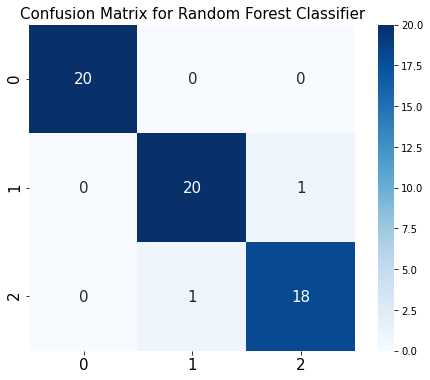

In [39]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

The accuracy of the Logistic Regression is: 95.0 %

The classification report for Logistic Regression is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      0.95      0.93        21
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



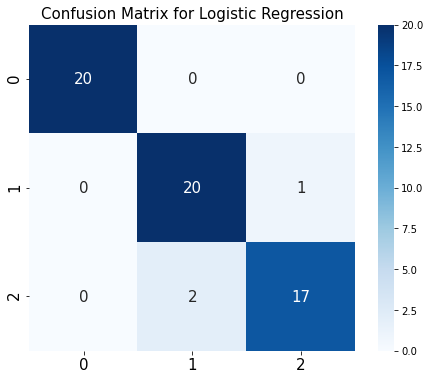

In [50]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')